C:\Users\Sanjay G\AppData\Local\Temp\ipykernel_29448\1979302785.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toss_wins.index, y=toss_wins.values, palette='coolwarm')


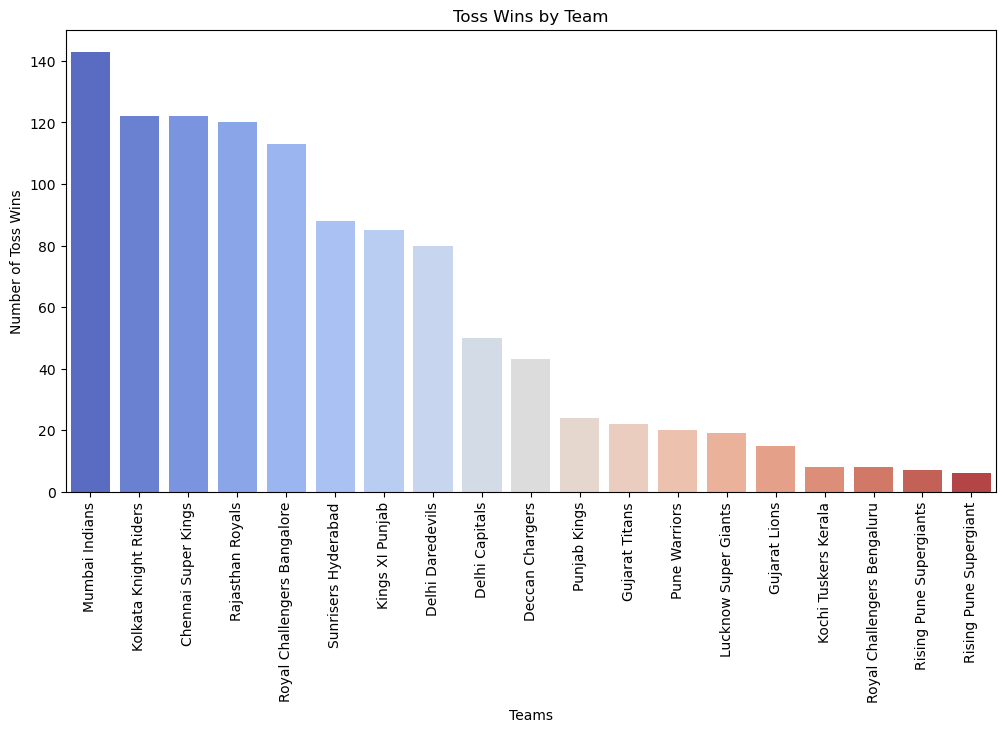

C:\Users\Sanjay G\AppData\Local\Temp\ipykernel_29448\1979302785.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=match_wins.index, y=match_wins.values, palette='viridis')


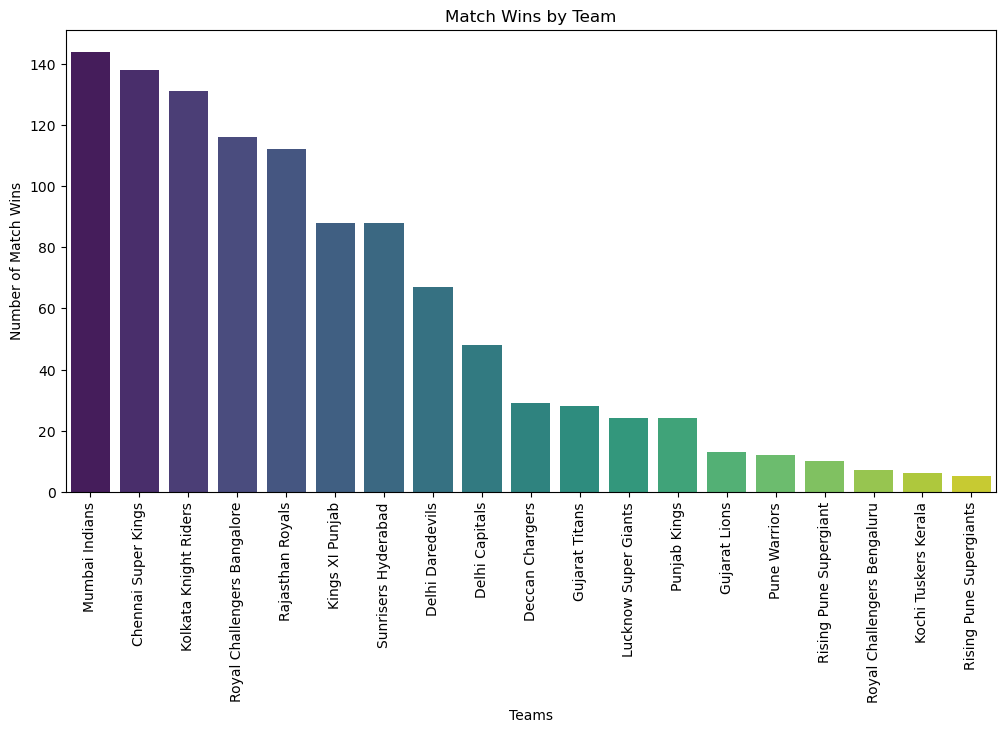

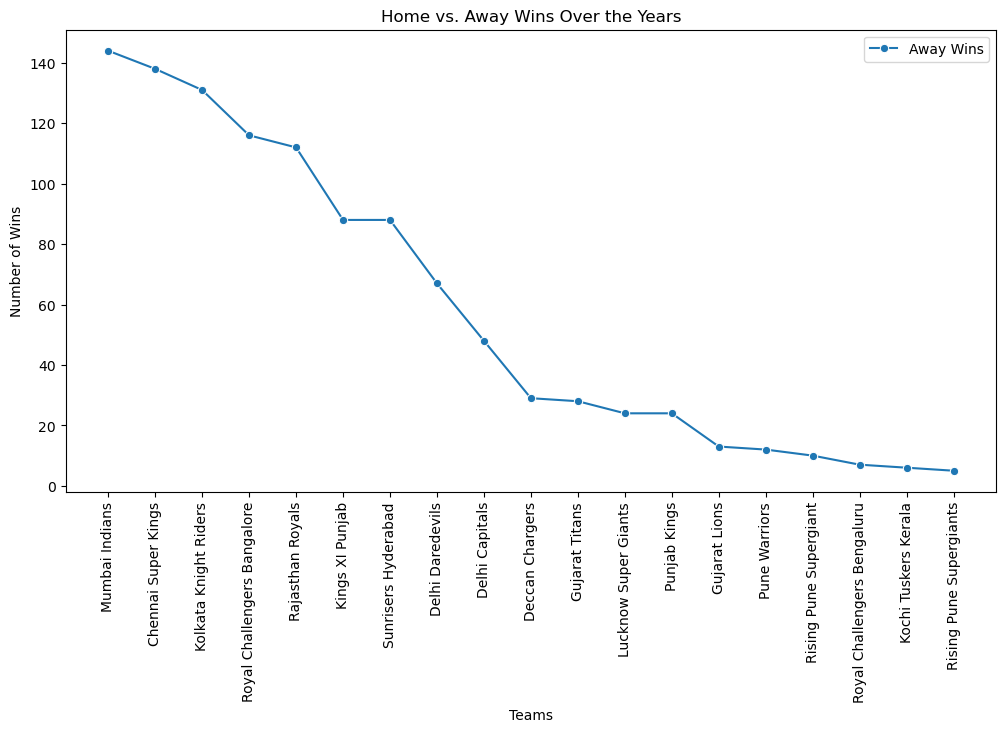

C:\Users\Sanjay G\AppData\Local\Temp\ipykernel_29448\1979302785.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_percentage.index, y=win_percentage.values, palette='coolwarm')


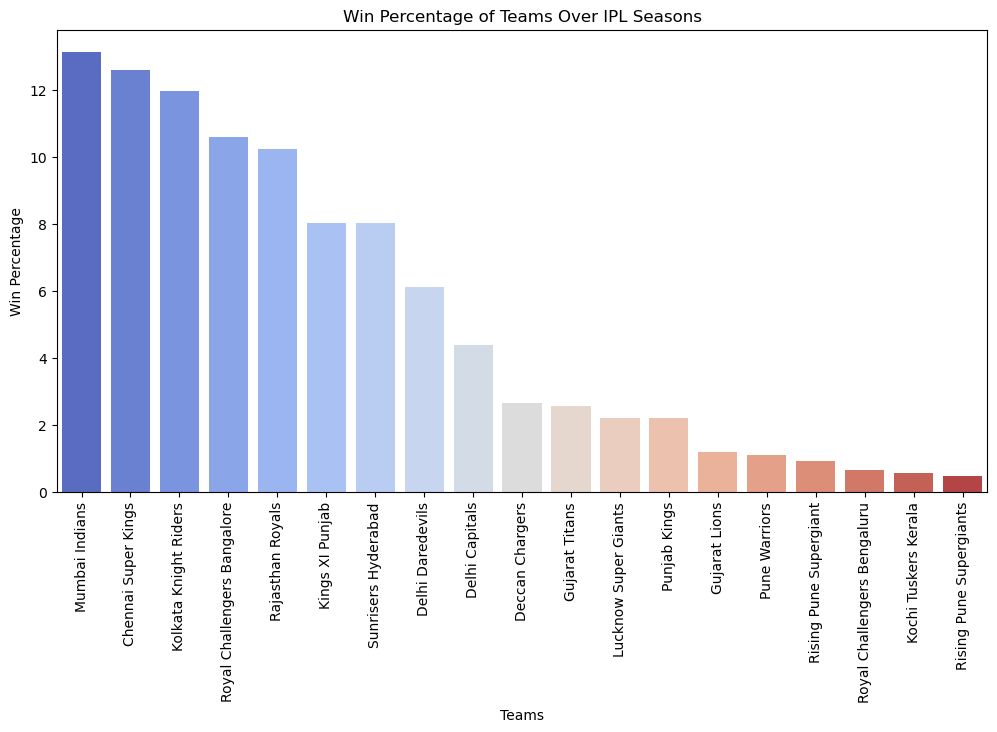

C:\Users\Sanjay G\AppData\Local\Temp\ipykernel_29448\1979302785.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='viridis', ax=axes[0])
C:\Users\Sanjay G\AppData\Local\Temp\ipykernel_29448\1979302785.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='magma', ax=axes[1])


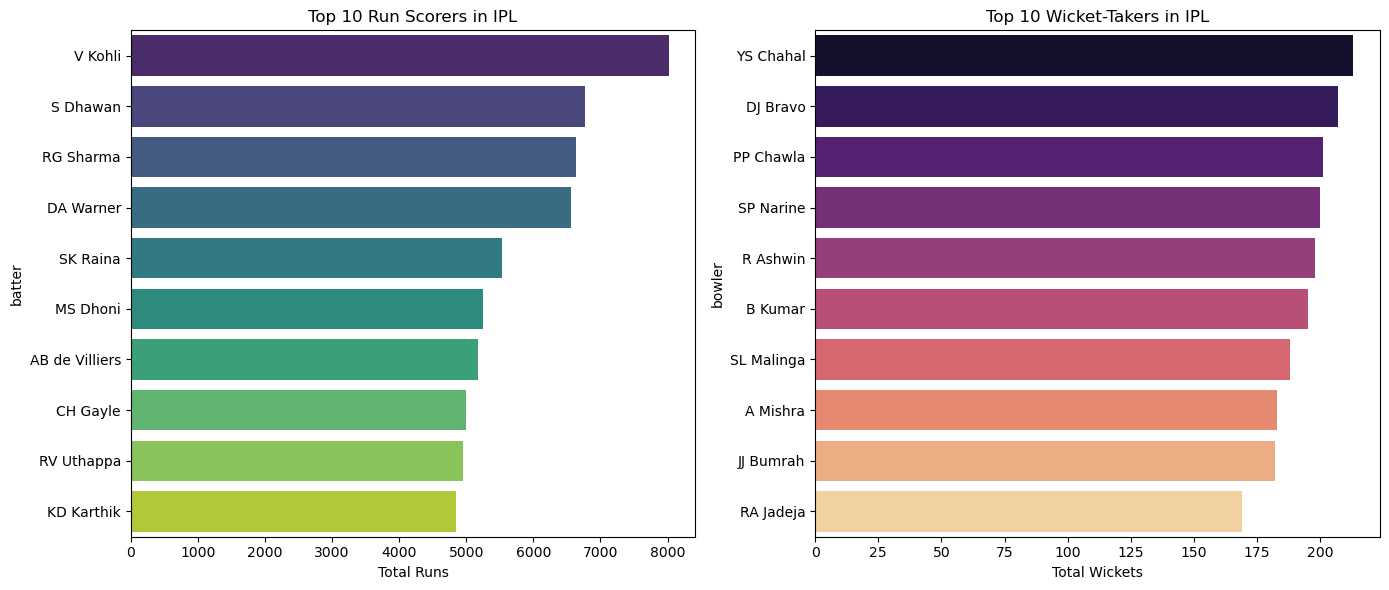

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
deliveries_df = pd.read_csv('deliveries.csv')
matches_df = pd.read_csv('matches.csv')

# 1. Visualize trends in toss wins and match wins
toss_wins = matches_df['toss_winner'].value_counts()
match_wins = matches_df['winner'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=toss_wins.index, y=toss_wins.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Toss Wins by Team')
plt.xlabel('Teams')
plt.ylabel('Number of Toss Wins')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=match_wins.index, y=match_wins.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Match Wins by Team')
plt.xlabel('Teams')
plt.ylabel('Number of Match Wins')
plt.show()

# 2. Analyze home advantage & impact of toss decisions
home_wins = matches_df[matches_df['team1'] == matches_df['venue']]['winner'].value_counts()
away_wins = matches_df[matches_df['team1'] != matches_df['venue']]['winner'].value_counts()

plt.figure(figsize=(12, 6))
sns.lineplot(x=home_wins.index, y=home_wins.values, marker='o', label='Home Wins')
sns.lineplot(x=away_wins.index, y=away_wins.values, marker='o', label='Away Wins')
plt.xticks(rotation=90)
plt.title('Home vs. Away Wins Over the Years')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.legend()
plt.show()

# 3. Identify strong and weak teams over the years
win_percentage = (matches_df['winner'].value_counts() / len(matches_df)) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=win_percentage.index, y=win_percentage.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Win Percentage of Teams Over IPL Seasons')
plt.xlabel('Teams')
plt.ylabel('Win Percentage')
plt.show()

# 4. Find key players and their performance impact
# Top 10 Run Scorers
top_batsmen = deliveries_df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
# Top 10 Wicket-Takers
top_bowlers = deliveries_df[deliveries_df['is_wicket'] == 1].groupby('bowler')['is_wicket'].count().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 Run Scorers in IPL')
axes[0].set_xlabel('Total Runs')

sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='magma', ax=axes[1])
axes[1].set_title('Top 10 Wicket-Takers in IPL')
axes[1].set_xlabel('Total Wickets')

plt.tight_layout()
plt.show()